<div style="text-align: right">  인공지능학과 202192033 권윤형</div>

> # 기본코드

In [ ]:
import cv2
from pop import Util
import numpy as np
import matplotlib.pyplot as plt

def get_mask(img):
    mask = np.zeros_like(img)
    height = img.shape[0]
    width = img.shape[1]
    if len(img.shape) > 2:
        channel_count = img.shape[2]
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
    imshape = img.shape
    vertics = np.array([[(0,120),(40, 0), (120,0), (160,120)]])
    cv2.fillPoly(mask, vertics, ignore_mask_color)
    return mask

def hough_lines(crop_img, edge_img, rho=2, theta=np.pi/180, threshold=50, min_line_len=50, max_line_gap=30):
    lines = cv2.HoughLinesP(edge_img, rho, theta, threshold, min_line_len, max_line_gap)
    if lines is not None:
        for line in lines:
            for x1,y1,x2,y2 in line:
                cv2.line(crop_img, (x1,y1), (x2,y2), (0,0,255), 2)
    return crop_img


Util.enable_imshow()
cam = Util.gstrmer(width=640, height=480)
camera = cv2.VideoCapture(cam, cv2.CAP_GSTREAMER)

if not camera.isOpened():
    print('not found camera')
    
width = camera.get(cv2.CAP_PROP_FRAME_WIDTH)
height = camera.get(cv2.CAP_PROP_FRAME_HEIGHT)
                    
flag = True
                    
# 카메라로부터 프레임 가져오기
while True:
    ret, frame = camera.read()
    if not ret:
        break
    crop_img = frame[100:160, 0: 160]
    cv2.imshow('Cropped', crop_img)
                    
    # 경계선 검출
    gray_img = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY) 
    blur_img = cv2.GaussianBlur(gray_img, (5,5), 0) 
    edge_img = cv2.Canny(blur_img,60, 100)

    # ROI 설정
    mask = get_mask(edge_img)
    if flag:
        plt.figure(figsize =(5,4))
        plt.axis('off')
        plt.imshow(mask, cmap='gray')
        plt.show()
        flag = False
    masked_img = cv2.bitwise_and(edge_img, mask)
    cv2.imshow('Masked_img', masked_img)
               
    # ROI 내 선찾아 표시하기
    cv2.imshow('Line_img',hough_lines(crop_img, masked_img))
    
    # 이동제어 루틴 코드 포함 필요
    
camera.release()


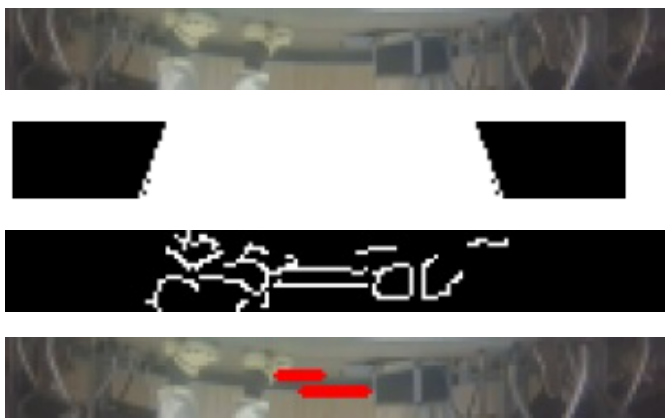

># 출력 화면 조정

### 1. 카메라 픽셀 변경

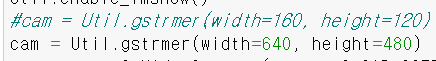

### 2. 이미지 출력 상하좌우 반전

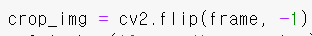

### 3. 화면 제한 반경 변경

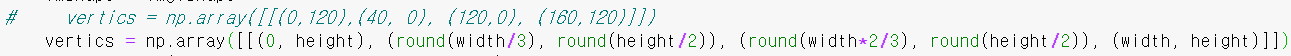

In [ ]:
import cv2
from pop import Util
import numpy as np
import matplotlib.pyplot as plt

def get_mask(img):
    mask = np.zeros_like(img)
    height = img.shape[0]
    width = img.shape[1]
    if len(img.shape) > 2:
        channel_count = img.shape[2]
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
    imshape = img.shape
#     vertics = np.array([[(0,120),(40, 0), (120,0), (160,120)]])
    vertics = np.array([[(0, height), (round(width/3), round(height/2)), (round(width*2/3), round(height/2)), (width, height)]])
    cv2.fillPoly(mask, vertics, ignore_mask_color)
    return mask

def hough_lines(crop_img, edge_img, rho=2, theta=np.pi/180, threshold=50, min_line_len=50, max_line_gap=30):
    lines = cv2.HoughLinesP(edge_img, rho, theta, threshold, min_line_len, max_line_gap)
    if lines is not None:
        for line in lines:
            for x1,y1,x2,y2 in line:
                cv2.line(crop_img, (x1,y1), (x2,y2), (0,0,255), 2)
    return crop_img

Util.enable_imshow()
#cam = Util.gstrmer(width=160, height=120)
cam = Util.gstrmer(width=640, height=480)
camera = cv2.VideoCapture(cam, cv2.CAP_GSTREAMER)

if not camera.isOpened():
    print('not found camera')
    
width = camera.get(cv2.CAP_PROP_FRAME_WIDTH)
height = camera.get(cv2.CAP_PROP_FRAME_HEIGHT)
                    
flag = True
                    
# 카메라로부터 프레임 가져오기
while True:
    ret, frame = camera.read()
    if not ret:
        break

    crop_img = cv2.flip(frame, -1)
    cv2.imshow('Cropped', crop_img)
                    
    # 경계선 검출
    gray_img = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY) 
    blur_img = cv2.GaussianBlur(gray_img, (5,5), 0) 
    edge_img = cv2.Canny(blur_img,60, 100)

    # ROI 설정
    mask = get_mask(edge_img)
    if flag:
        plt.figure(figsize =(5,4))
        plt.axis('off')
        plt.imshow(mask, cmap='gray')
        plt.show()
        flag = False
    masked_img = cv2.bitwise_and(edge_img, mask)
    cv2.imshow('Masked_img', masked_img)
               
    # ROI 내 선찾아 표시하기
    cv2.imshow('Line_img',hough_lines(crop_img, masked_img))
    
    # 이동제어 루틴 코드 포함 필요
    
camera.release()


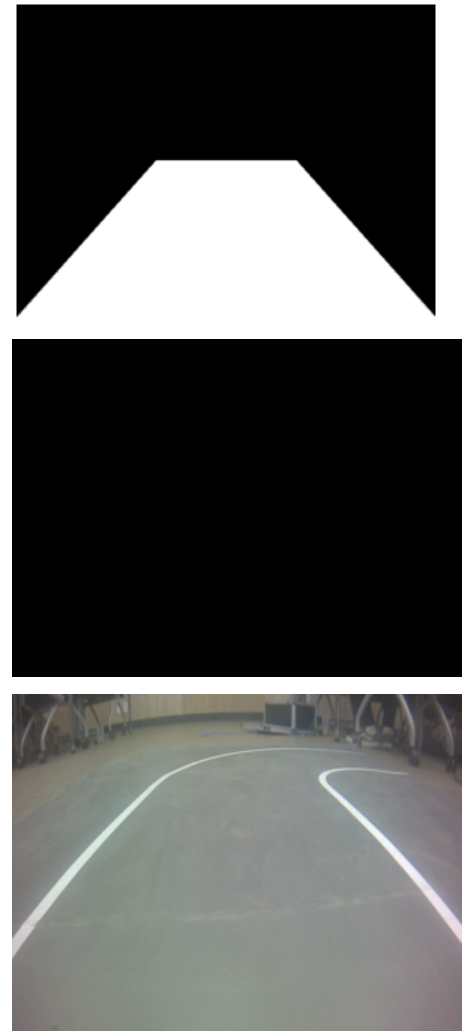

### 문제 발생 : 직선을 인식하지 못함

> # 사다리꼴 -> 하단부

### 코드 변경 전

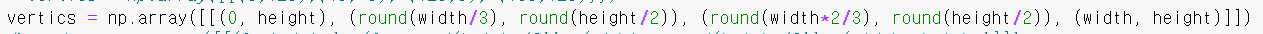

### 코드 변경 후

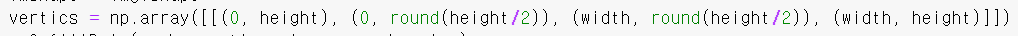

In [ ]:


import cv2
from pop import Util
import numpy as np
import matplotlib.pyplot as plt

def get_mask(img):
    mask = np.zeros_like(img)
    height = img.shape[0]
    width = img.shape[1]
    if len(img.shape) > 2:
        channel_count = img.shape[2]
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
    imshape = img.shape
    vertics = np.array([[(0, height), (0, round(height/2)), (width, round(height/2)), (width, height)]])
    cv2.fillPoly(mask, vertics, ignore_mask_color)
    return mask

def hough_lines(crop_img, edge_img, rho=2, theta=np.pi/180, threshold=50, min_line_len=50, max_line_gap=30):
    lines = cv2.HoughLinesP(edge_img, rho, theta, threshold, min_line_len, max_line_gap)
    if lines is not None:
        for line in lines:
            for x1,y1,x2,y2 in line:
                cv2.line(crop_img, (x1,y1), (x2,y2), (0,0,255), 2)
    return crop_img


Util.enable_imshow()
cam = Util.gstrmer(width=640, height=480)
camera = cv2.VideoCapture(cam, cv2.CAP_GSTREAMER)

if not camera.isOpened():
    print('not found camera')
    
width = camera.get(cv2.CAP_PROP_FRAME_WIDTH)
height = camera.get(cv2.CAP_PROP_FRAME_HEIGHT)
                    
flag = True
                    
# 카메라로부터 프레임 가져오기
while True:
    ret, frame = camera.read()
    if not ret:
        break
        
    crop_img = cv2.flip(frame, -1)
    cv2.imshow('Cropped', crop_img)
                    
    # 경계선 검출
    gray_img = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY) 
    blur_img = cv2.GaussianBlur(gray_img, (5,5), 0) 
    edge_img = cv2.Canny(blur_img,60, 100)

    # ROI 설정
    mask = get_mask(edge_img)
    if flag:
        plt.figure(figsize =(5,4))
        plt.axis('off')
        plt.imshow(mask, cmap='gray')
        plt.show()
        flag = False
    masked_img = cv2.bitwise_and(edge_img, mask)
    cv2.imshow('Masked_img', masked_img)
               
    # ROI 내 선찾아 표시하기
    cv2.imshow('Line_img',hough_lines(crop_img, masked_img))

camera.release()


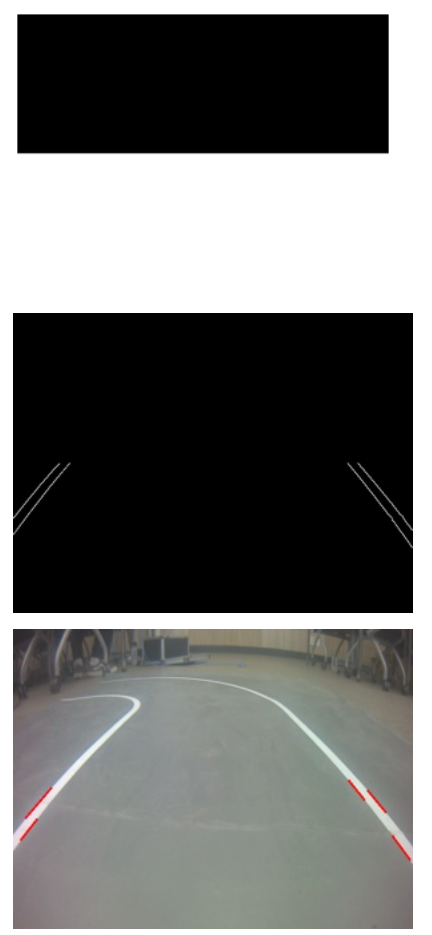

> # 중간에 파란 선

### hough_line()으로 추출한 두 직선의 중간에 파란색 선을 긋기

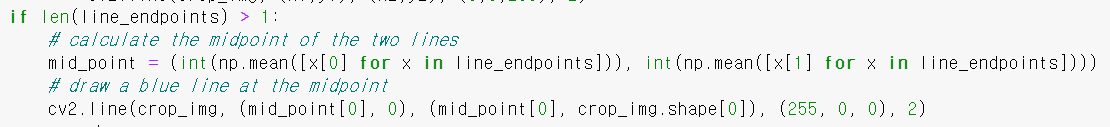

In [ ]:



import cv2
from pop import Util
import numpy as np
import matplotlib.pyplot as plt

def get_mask(img):
    mask = np.zeros_like(img)
    height = img.shape[0]
    width = img.shape[1]
    if len(img.shape) > 2:
        channel_count = img.shape[2]
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
    imshape = img.shape
    vertics = np.array([[(0, height), (0, round(height/2)), (width, round(height/2)), (width, height)]])
    cv2.fillPoly(mask, vertics, ignore_mask_color)
    return mask

def hough_lines(crop_img, edge_img, rho=2, theta=np.pi/180, threshold=50, min_line_len=50, max_line_gap=30):
    lines = cv2.HoughLinesP(edge_img, rho, theta, threshold, min_line_len, max_line_gap)
    if lines is not None:
        line_endpoints = []
        for line in lines:
            for x1,y1,x2,y2 in line:
                line_endpoints.append((x1, y1))
                line_endpoints.append((x2, y2))
                cv2.line(crop_img, (x1,y1), (x2,y2), (0,0,255), 2)
        if len(line_endpoints) > 1:
            # calculate the midpoint of the two lines
            mid_point = (int(np.mean([x[0] for x in line_endpoints])), int(np.mean([x[1] for x in line_endpoints])))
            # draw a blue line at the midpoint
            cv2.line(crop_img, (mid_point[0], 0), (mid_point[0], crop_img.shape[0]), (255, 0, 0), 2)
    return crop_img

Util.enable_imshow()
cam = Util.gstrmer(width=640, height=480)
camera = cv2.VideoCapture(cam, cv2.CAP_GSTREAMER)

if not camera.isOpened():
    print('not found camera')
    
width = camera.get(cv2.CAP_PROP_FRAME_WIDTH)
height = camera.get(cv2.CAP_PROP_FRAME_HEIGHT)
                    
flag = True
                    
# 카메라로부터 프레임 가져오기
while True:
    ret, frame = camera.read()
    if not ret:
        break
        
    crop_img = cv2.flip(frame, -1)
    cv2.imshow('Cropped', crop_img)
                    
    # 경계선 검출
    gray_img = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY) 
    blur_img = cv2.GaussianBlur(gray_img, (5,5), 0) 
    edge_img = cv2.Canny(blur_img,60, 100)

    # ROI 설정
    mask = get_mask(edge_img)
    if flag:
        plt.figure(figsize =(5,4))
        plt.axis('off')
        plt.imshow(mask, cmap='gray')
        plt.show()
        flag = False
    masked_img = cv2.bitwise_and(edge_img, mask)
    cv2.imshow('Masked_img', masked_img)
               
    # ROI 내 선찾아 표시하기
    cv2.imshow('Line_img',hough_lines(crop_img, masked_img))

camera.release()




### 대부분의 경우 가운데 부분에 파란선 위치

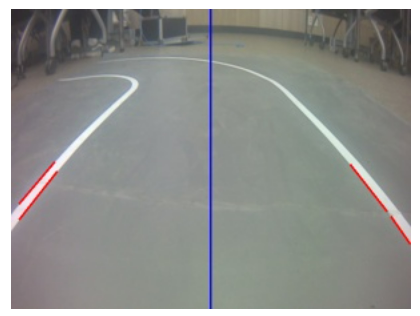

### 가끔 파란선이 양쪽 끝에 위치

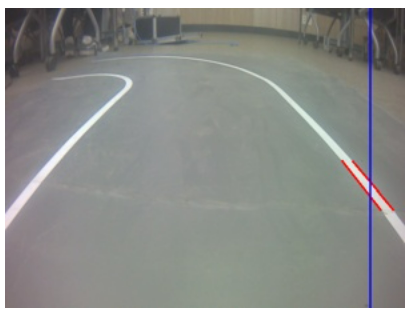

> # 일정 거리 이상의 두 직선의 중간선(파란선) 추출

### - 두 직선의 거리 distance를 계산하여 일정 거리 이상인 것들의 중간선만 추출

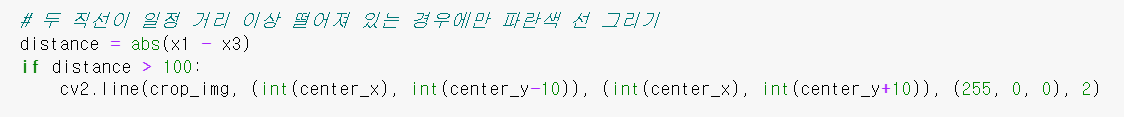

In [ ]:



import cv2
from pop import Util
import numpy as np
import matplotlib.pyplot as plt

def get_mask(img):
    mask = np.zeros_like(img)
    height = img.shape[0]
    width = img.shape[1]
    if len(img.shape) > 2:
        channel_count = img.shape[2]
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
    imshape = img.shape
    vertics = np.array([[(0, height), (0, int(round(height/2))), (width, int(round(height/2))), (width, height)]])
    cv2.fillPoly(mask, vertics, ignore_mask_color)
    return mask


def hough_lines(crop_img, edge_img, rho=2, theta=np.pi/180, threshold=50, min_line_len=50, max_line_gap=30):
    lines = cv2.HoughLinesP(edge_img, rho, theta, threshold, min_line_len, max_line_gap)
    if lines is not None:
        # 두 개 이상의 직선이 검출된 경우
        if len(lines) >= 2:
            # 두 직선 중앙점 계산
            x1, y1, x2, y2 = lines[0][0]
            x3, y3, x4, y4 = lines[1][0]
            center_x = round((x1+x2+x3+x4)/4)
            center_y = round((y1+y2+y3+y4)/4)
            
            # 두 직선이 일정 거리 이상 떨어져 있는 경우에만 파란색 선 그리기
            distance = abs(x1 - x3)
            if distance > 100:
                cv2.line(crop_img, (int(center_x), int(center_y-10)), (int(center_x), int(center_y+10)), (255, 0, 0), 2)


            # 직선 그리기
            for line in lines:
                for x1, y1, x2, y2 in line:
                    cv2.line(crop_img, (x1, y1), (x2, y2), (0,0,255), 2)
    return crop_img

Util.enable_imshow()
cam = Util.gstrmer(width=640, height=480)
camera = cv2.VideoCapture(cam, cv2.CAP_GSTREAMER)

if not camera.isOpened():
    print('not found camera')
    
width = camera.get(cv2.CAP_PROP_FRAME_WIDTH)
height = camera.get(cv2.CAP_PROP_FRAME_HEIGHT)
                    
flag = True
                    
# 카메라로부터 프레임 가져오기
while True:
    ret, frame = camera.read()
    if not ret:
        break
        
    crop_img = cv2.flip(frame, -1)
    cv2.imshow('Cropped', crop_img)
                    
    # 경계선 검출
    gray_img = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY) 
    blur_img = cv2.GaussianBlur(gray_img, (5,5), 0) 
    edge_img = cv2.Canny(blur_img, 60, 100)

    # ROI 설정
    mask = get_mask(edge_img)
    if flag:
        plt.figure(figsize =(5,4))
        plt.axis('off')
        plt.imshow(mask, cmap='gray')
        plt.show()
        flag = False
    masked_img = cv2.bitwise_and(edge_img, mask)
    cv2.imshow('Masked_img', masked_img)
               
    # ROI 내 선찾아 표시하기
    cv2.imshow('Line_img',hough_lines(crop_img, masked_img))

camera.release()




### 중간 근처에서만 파란선이 움직임

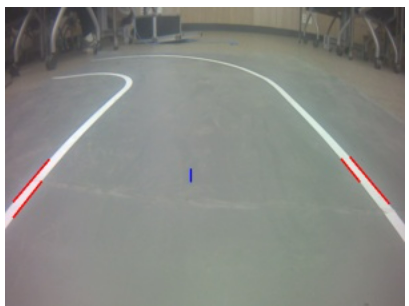

### 그 이외의 경우에는 파란선 추출 X

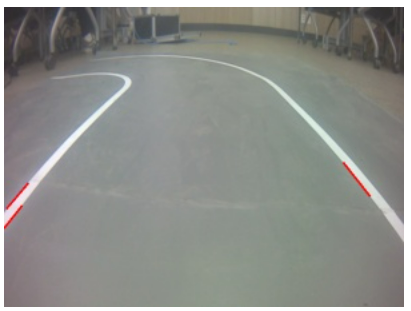

> # 최종 트레이서 코드

### 1. hough_lines 로 구한 두 직선의 중간값 center_x 값과 화면의 중앙 img_center_x 값 구한다.

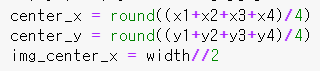

### 2. center_x와 img_center_x 값을 이용하여 각도 angle 구한다.

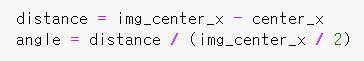

### 3. angle 값을 car.steering() 값으로 넣고 주행시킨다.

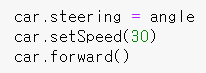

### 4. car.steering(angle)로 변경된 각도를 불필요하게 유지하여 라인 이탈하는 것을 방지하기 위하여 time.sleep() 적용

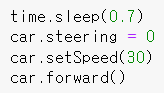

In [ ]:
import cv2
from pop import Util
import numpy as np
import matplotlib.pyplot as plt
from pop import Pilot
import time

car = Pilot.AutoCar()

def get_mask(img):
    mask = np.zeros_like(img)
    height = img.shape[0]
    width = img.shape[1]
    if len(img.shape) > 2:
        channel_count = img.shape[2]
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
    imshape = img.shape
    vertics = np.array([[(0, height), (0, int(round(height/2))), (width, int(round(height/2))), (width, height)]])
    cv2.fillPoly(mask, vertics, ignore_mask_color)
    return mask

def hough_lines(crop_img, edge_img, rho=2, theta=np.pi/180, threshold=50, min_line_len=50, max_line_gap=30):
    lines = cv2.HoughLinesP(edge_img, rho, theta, threshold, min_line_len, max_line_gap)
    if lines is not None:
        # 두 개 이상의 직선이 검출된 경우
        if len(lines) >= 2:
            # 두 직선 중앙점 계산
            x1, y1, x2, y2 = lines[0][0]
            x3, y3, x4, y4 = lines[1][0]
            center_x = round((x1+x2+x3+x4)/4)
            center_y = round((y1+y2+y3+y4)/4)
            img_center_x = width//2

            # 두 직선이 일정 거리 이상 떨어져 있는 경우에만 파란색 선 그리기
            distance = abs(x1 - x3)
            if distance > 100:
                cv2.line(crop_img, (int(center_x), int(center_y-10)), (int(center_x), int(center_y+10)), (255, 0, 0), 2)
                
                distance = img_center_x - center_x
                angle = distance / (img_center_x / 2)
                
                if angle < -1:
                    angle = -1
                elif angle > 1:
                    angle = 1
                else:
                    angle = angle
            
                car.steering = angle
                car.setSpeed(30)
                car.forward()

                time.sleep(0.7)
                car.steering = 0
                car.setSpeed(30)
                car.forward()

            # 직선 그리기
            for line in lines:
                for x1, y1, x2, y2 in line:
                    cv2.line(crop_img, (x1, y1), (x2, y2), (0,0,255), 2)
                    
    return crop_img


Util.enable_imshow()
cam = Util.gstrmer(width=640, height=480)
camera = cv2.VideoCapture(cam, cv2.CAP_GSTREAMER)

if not camera.isOpened():
    print('not found camera')
    
width = camera.get(cv2.CAP_PROP_FRAME_WIDTH)
height = camera.get(cv2.CAP_PROP_FRAME_HEIGHT)
                    
flag = True
                    
# 카메라로부터 프레임 가져오기
while True:
    ret, frame = camera.read()
    if not ret:
        break
        
    crop_img = cv2.flip(frame, -1)
    cv2.imshow('Cropped', crop_img)
                    
    # 경계선 검출
    gray_img = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY) 
    blur_img = cv2.GaussianBlur(gray_img, (5,5), 0) 
    edge_img = cv2.Canny(blur_img,60, 100)

    # ROI 설정
    mask = get_mask(edge_img)
    if flag:
        plt.figure(figsize =(5,4))
        plt.axis('off')
        plt.imshow(mask, cmap='gray')
        plt.show()
        flag = False
    masked_img = cv2.bitwise_and(edge_img, mask)
    cv2.imshow('Masked_img', masked_img)
               
    # ROI 내 선찾아 표시하기
    cv2.imshow('Line_img',hough_lines(crop_img, masked_img))
    
camera.release()